In [ ]:
!pip install retina-face

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from retinaface import RetinaFace
import math
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img_path = "wenwen.jpg"
img_path2 = "billie.jpg"

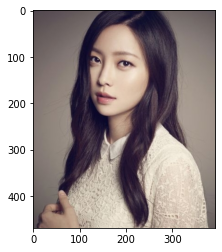

In [ ]:
img = cv2.imread(img_path)
plt.imshow(img[:, :, ::-1])

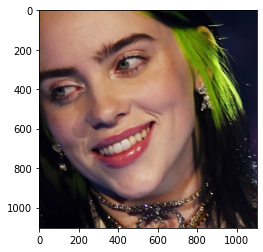

In [ ]:
img2 = cv2.imread(img_path2)
plt.imshow(img2[:, :, ::-1])

In [ ]:
resp = RetinaFace.detect_faces(img_path)
resp2 = RetinaFace.detect_faces(img_path2)

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:05<00:00, 22.7MB/s]


In [ ]:
resp

{'face_1': {'facial_area': [113, 32, 251, 228],
  'landmarks': {'left_eye': [192.83011, 117.40244],
   'mouth_left': [177.98712, 187.37965],
   'mouth_right': [136.87355, 180.86188],
   'nose': [145.49652, 153.27155],
   'right_eye': [136.25761, 109.95628]},
  'score': 0.9988237023353577}}

In [ ]:
resp2

{'face_1': {'facial_area': [0, 24, 676, 856],
  'landmarks': {'left_eye': [442.41797, 298.16595],
   'mouth_left': [547.1221, 578.04333],
   'mouth_right': [268.12845, 681.5988],
   'nose': [342.9226, 519.73834],
   'right_eye': [140.19704, 419.02087]},
  'score': 0.9954636693000793}}

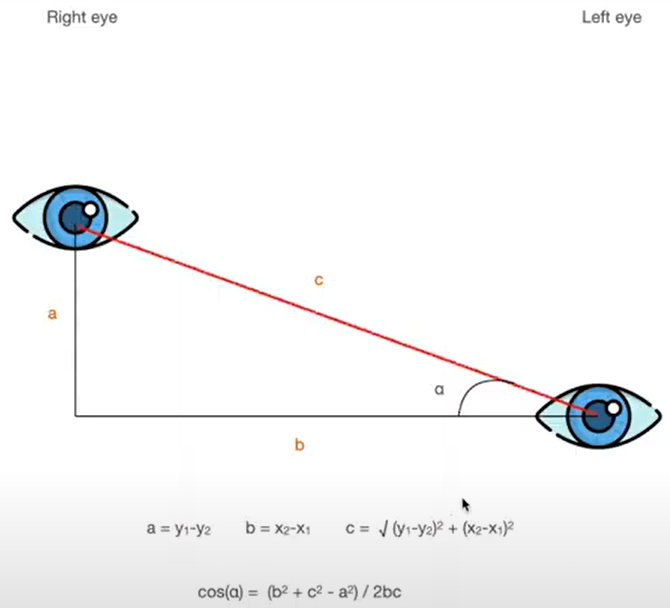

In [ ]:
x1, y1 = resp["face_1"]["landmarks"]["right_eye"]
x2, y2 = resp["face_1"]["landmarks"]["left_eye"]

In [ ]:
x12, y12 = resp2["face_1"]["landmarks"]["right_eye"]
x22, y22 = resp2["face_1"]["landmarks"]["left_eye"]

In [ ]:
a = abs(y1 - y2)
b = abs(x1 - x2) 
c = math.sqrt(a*a + b*b)

In [ ]:
a2 = abs(y12 - y22)
b2 = abs(x12 - x22) 
c2 = math.sqrt(a2*a2 + b2*b2)

In [ ]:
a, b, c

(7.4461594, 56.572495, 57.060427039975565)

In [ ]:
cos_alpha = (b*b + c*c - a*a) / (2*b*c)
cos_alpha

0.9914488138650818

In [ ]:
cos_alpha2 = (b2*b2 + c2*c2 - a2*a2) / (2*b2*c2)
cos_alpha2

0.9285121323331642

In [ ]:
alpha = np.arccos(cos_alpha)
alpha = (alpha * 180) / math.pi
if y1 > y2: 
  alpha = alpha - 45
alpha

7.498264814788613

In [ ]:
alpha2 = np.arccos(cos_alpha2)
alpha2 = (alpha2 * 180) / math.pi
if y12 > y22: 
  alpha2 = alpha2 - 45
alpha2

-23.204058846062267

In [ ]:
aligned_img = Image.fromarray(img)

In [ ]:
aligned_img2 = Image.fromarray(img2)

In [ ]:
aligned_img = np.array(aligned_img.rotate(alpha))

In [ ]:
aligned_img2 = np.array(aligned_img2.rotate(alpha2))

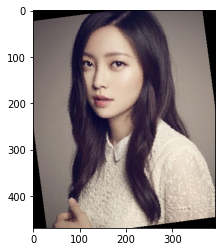

In [ ]:
plt.imshow(aligned_img[:, :, ::-1])

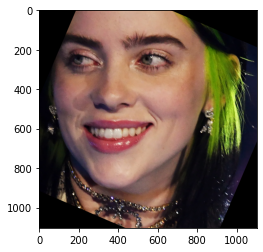

In [ ]:
plt.imshow(aligned_img2[:, :, ::-1])